## モデルの評価と精度をあげる方法とは
#### 機械学習の課題とアプローチ
①新しいデータに適合できない場合  
オーバーフィッティング(過学習)  
あらかじめテスト用にデータを抜き出しておくホールドアウト法や交差検証法がある  
②モデルの良さの判定する指標や方法  
予測精度をはかるための混同行列やROC曲線がある  
③精度が高いモデルを作成するには  
アンサンブル学習  
個々の学習結果を組み合わせて複数の結果で予測する  
バギング、ブースティングなど

In [87]:
#データ加工、処理・分析ライブラリ
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series ,DataFrame

#可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
sns.set()

#機械学習ライブラリ
import sklearn

%precision 3

'%.3f'

### ホールドアウト法と交差検証法
ホールドアウト法  
学習データとテストデータの２つランダムに分けて学習モデルで構築し、テストデータで検証する方法  
メリット  
高い汎化性能  
デメリット  
ランダムに選ばれた学習データに引っ張られる(データ量が少ない場合データが偏るかもしれない)  
半分にデータを分け、学習データが少なくなるためにそもそも学習が進まない可能性がある  
  
交差検証法(k分割交差検証)  
データの役割を学習用と検証用に交差させる検証法  


In [88]:
#必要なライブラリ等のインポート
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#乳がんのデータを読み込む
cancer = load_breast_cancer()

#決定木クラスの初期化
tree = DecisionTreeClassifier(criterion='entropy',max_depth = 3,random_state=0)

#k分割交差検証の実行
scores = cross_val_score(tree,cancer.data,cancer.target,cv = 5)

#結果の表示
print('cross validation scores:{}'.format(scores))
print('Cross validation scores:{:.3f}+-{:.3f}'.format(scores.mean(),scores.std()))

cross validation scores:[0.904 0.912 0.956 0.939 0.956]
Cross validation scores:0.933+-0.022


In [89]:
#練習問題10-1
#ロジスティック回帰

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#ロジスティック回帰のためのインポート
from sklearn.linear_model import LogisticRegression

#乳がんのデータを読み込むs
cancer = load_breast_cancer()
#ロジスティック回帰の初期化
model = LogisticRegression()
#k分割交差検証の実行
scores = cross_val_score(model,cancer.data,cancer.target)
#結果の表示
print('cross validation scores:{}'.format(scores))
print('Cross validation scores:{:.3f}+-{:.3f}'.format(scores.mean(),scores.std()))

cross validation scores:[0.93  0.939 0.956 0.956 0.956]
Cross validation scores:0.947+-0.011


/Users/ogawakoshin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ogawakoshin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

#### パフォーマンスチューニング:ハイパーパラメータチューニング
モデルの汎化性能を向上させるための手法  
グリッドサーチ：アルゴリズムが固有に持つハイパーパラメータのチューニング手法  
ハイパーパラメータ：予め人が実装上の都合から決めておくパラメータのこと(木の深さ、正則化のパラメータなど)  
注目したいいくつかのハイパーパラメータの全ての組み合わせについて交差検証を行い、  
最も性能が高いパラメータの組み合わせを探索してベストモデルとして学習する

ベストスコア:0.91
その時のパラメータ(gamma,C):(0.001, 1.0)


<Axes: >

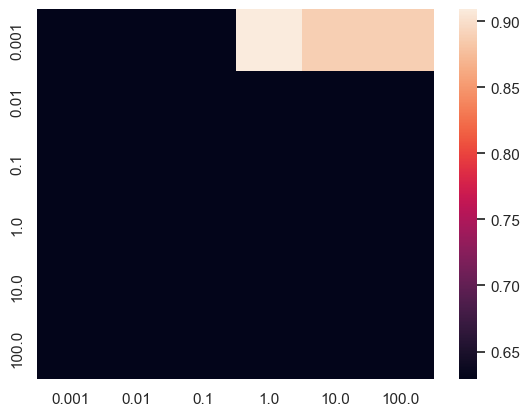

In [90]:
#インポート
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#乳がんのデータを読み込み

cancer = load_breast_cancer()
#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 0
)
#ハイパーパラメータの全ての組み合わせでモデル構築・検証
scores = {}
for gamma in np.logspace(-3,2,num=6):
    for C in np.logspace(-3,2,num=6):
        svm = SVC(gamma = gamma,C=C)
        svm.fit(X_train,y_train)
        scores[(gamma,C)]=svm.score(X_test,y_test)

#検証結果をscoresに格納
scores = pd.Series(scores)

#表示
print('ベストスコア:{:.2f}'.format(scores.max()))
print('その時のパラメータ(gamma,C):{}'.format(scores.idxmax()))

#ヒートマップを表示。縦軸にgamma,横軸にCを表示
sns.heatmap(scores.unstack())

In [91]:
#GridSearchCV関数を用いてグリッドサーチをする
#インポート
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

#乳がんのデータを読み込み

cancer = load_breast_cancer()
#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 0
)
#ハイパーパラメータの全ての組み合わせでモデル構築・検証
param_grid = {
    'C':np.logspace(-3,2,num=6),
    'gamma':np.logspace(-3,2,num=6)
}

#GridSearchCVの初期化
gs = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5
)

#ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train,y_train)

#表示
print('Best cross validation score :{:.3f}'.format(gs.best_score_))
print('Best parameters :{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

Best cross validation score :0.925
Best parameters :{'C': 1.0, 'gamma': 0.001}
Test score:0.909


### ランダムサーチ  
モンテカルロ的にハイパーパラメータをランダムに選ぶことを繰り返すことで  
最適解を見つける手法  

### heperopt  
https://qiita.com/kenchin110100/items/ac3edb480d789481f134  
Sequential Model-based Global Optimization（SMBO）  
パラメータを使用した際の損失を予測する関数とどのくらいそのパラメータに  
更新した際に損失が減りそうかの期待値の計算をする関数を用いて  
最適なハイパーパラメータを見つける枠組(MCMC法みたいなもの)  
Tree-structured Parzen Estimator Approach（TPE）  
パラメータを使用した際の損失を予測する関数とどのくらいそのパラメータに  
更新した際に損失が減りそうかの期待値の計算をする関数の枠組

In [92]:
#練習問題10-2
#GridSearchCV関数を用いてグリッドサーチをする
#インポート
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#乳がんのデータを読み込み
cancer = load_breast_cancer()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 0
)
#ハイパーパラメータの全ての組み合わせでモデル構築・検証
param_grid = {
    'max_depth':[2,3,4,5],
    'min_samples_leaf':[2,3,4,5]
}

#GridSearchCVの初期化
gs = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=5
)

#ハイパーパラメータの組み合わせの検証とベストモデルの構築
gs.fit(X_train,y_train)

#表示
print('Best cross validation score :{:.3f}'.format(gs.best_score_))
print('Best parameters :{}'.format(gs.best_params_))
print('Test score:{:.3f}'.format(gs.score(X_test,y_test)))

Best cross validation score :0.944
Best parameters :{'max_depth': 4, 'min_samples_leaf': 5}
Test score:0.937


#### パフォーマンスチューニング
特徴量の扱い  
学習不足の場合
過学習はしていないが学習がうまくいっていない場合はデータ量を増やして特徴量を増やす。  
特徴量を細かく分ける新しい変数を追加する.特徴量同士の比率を追加する(標準化する？)で特徴量を増やす。  

過学習の場合
特徴量の数を削る次元削減、特徴量を細かく分ける特徴選択、元の特徴空間軸を別の空間軸に変換する(主成分分析？)特徴抽出  
どの特徴量を生成するかを検討することを特徴量エンジニアリングという  

プロファイリングモデル:分類  
予測モデル:連続値の予測

## モデルの評価指標
#### 混同行列  
予測と実績の正例と負例を行列にしたもの

In [93]:
#はじめにSVMでガンの分類をする
#インポート
from sklearn.svm import SVC

#乳がんのデータを読み込み
cancer = load_breast_cancer()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 0
)

#クラスの初期化と学習
model = SVC(gamma = 0.001,C=1)
model.fit(X_train,y_train)

#表示
print('{}train score:{:.3f}'.format(model.__class__.__name__,model.score(X_train,y_train)))
print('{}test score:{:.3f}'.format(model.__class__.__name__,model.score(X_test,y_test)))

SVCtrain score:0.981
SVCtest score:0.909


In [94]:
#SVMでの結果を混同行列にする
#インポート
from sklearn.metrics import confusion_matrix

#テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m=confusion_matrix(y_test,y_pred)
print('confusion matrix :\n{}'.format(m))

confusion matrix :
[[49  4]
 [ 9 81]]


In [95]:
#正解率
accuracy=(m[0,0]+m[1,1])/m.sum()
print('正解率:{:.3f}'.format(accuracy))

#適合度
precision=(m[1,1])/m[:,1].sum()
#１と予測した中でどれだけ１であったかの割合

#再現率
recall = (m[1,1])/m[1,:].sum()
#実際に１だった中で正しく１と予測できた割合

#F1スコア
f1 = 2*(precision*recall)/(precision+recall)
#適合率と再現率の調和平均

print('適合度:{:.3f}'.format(precision))
print('再現度:{:.3f}'.format(recall))
print('F1値:{:.3f}'.format(f1))

正解率:0.909
適合度:0.953
再現度:0.900
F1値:0.926


In [96]:
#sklearnの関数
from sklearn.metrics import precision_score,recall_score,f1_score

print('適合率:{:.3f}'.format(precision_score(y_test,y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test,y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test,y_pred)))

適合率:0.953
再現率:0.900
F1値:0.926


In [97]:
#練習問題10-3
#ロジスティック回帰

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
#ロジスティック回帰のためのインポート
from sklearn.linear_model import LogisticRegression

#乳がんのデータを読み込むs
cancer = load_breast_cancer()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 0
)

#ロジスティック回帰の初期化
model = LogisticRegression()
model.fit(X_train,y_train)

#表示
print('{}train score:{:.3f}'.format(model.__class__.__name__,model.score(X_train,y_train)))
print('{}test score:{:.3f}'.format(model.__class__.__name__,model.score(X_test,y_test)))

LogisticRegressiontrain score:0.955
LogisticRegressiontest score:0.930


/Users/ogawakoshin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
#ロジスティック回帰での結果を混同行列にする
#インポート
from sklearn.metrics import confusion_matrix

#テストデータを使って予測値を算出
y_pred = model.predict(X_test)

m=confusion_matrix(y_test,y_pred)
print('confusion matrix :\n{}'.format(m))

confusion matrix :
[[48  5]
 [ 5 85]]


In [99]:
#sklearnの関数
from sklearn.metrics import precision_score,recall_score,f1_score

print('適合率:{:.3f}'.format(precision_score(y_test,y_pred)))
print('再現率:{:.3f}'.format(recall_score(y_test,y_pred)))
print('F1値:{:.3f}'.format(f1_score(y_test,y_pred)))

適合率:0.944
再現率:0.944
F1値:0.944


### 分類モデルの評価:ROC曲線とAUC
ROC曲線:  
縦軸に真陽性率(tpr)、横軸に偽陽性率(fpr)をプロットしたもの  
真陽性率:実際の正例のうちどれだけ正例と予測できたかの割合  
偽陽性率:実際は負例のうち正例と予測されてしまった割合  
予測確率を予測ラベルに変換する際の閾値を0.0と1.0の間で徐々に変化させ、  
真陽性率と偽陽性率の関係をプロットする

In [100]:
#ロジスティック回帰のためのインポート
from sklearn.linear_model import LogisticRegression

#乳がんのデータを読み込むs
cancer = load_breast_cancer()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 66
)

#ロジスティック回帰の初期化
model = LogisticRegression(random_state=0)
model.fit(X_train,y_train)

#テスト用データの予測確率を計算
results = pd.DataFrame(model.predict_proba(X_test),columns = cancer.target_names)

#先頭の５行を表示
results.head()

/Users/ogawakoshin/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,malignant,benign
0,0.004596,0.995404
1,0.000424,0.999576
2,0.026939,0.973061
3,0.007135,0.992865
4,0.003220,0.996780


In [101]:
#良性(benign)クラスの予測確率が0.4,0.3,0.15,0.05以上なら、それぞれの例に１を追加する
for threshold in [0.4,0.3,0.15,0.05]:
    results[f'flag_{threshold}']=results['benign'].map(lambda x:1 if x> threshold else 0)

#先頭の10行を表示
results.head(10)

,malignant,benign,flag_0.4,flag_0.3,flag_0.15,flag_0.05
0,0.004596,0.995404,1,1,1,1
1,0.000424,0.999576,1,1,1,1
2,0.026939,0.973061,1,1,1,1
3,0.007135,0.992865,1,1,1,1
4,0.003220,0.996780,1,1,1,1
5,0.006994,0.993006,1,1,1,1
6,0.006795,0.993205,1,1,1,1
7,0.003041,0.996959,1,1,1,1
8,0.887361,0.112639,0,0,0,1
9,0.864841,0.135159,0,0,0,1


<Axes: xlabel='false positive rate', ylabel='true positive rate'>

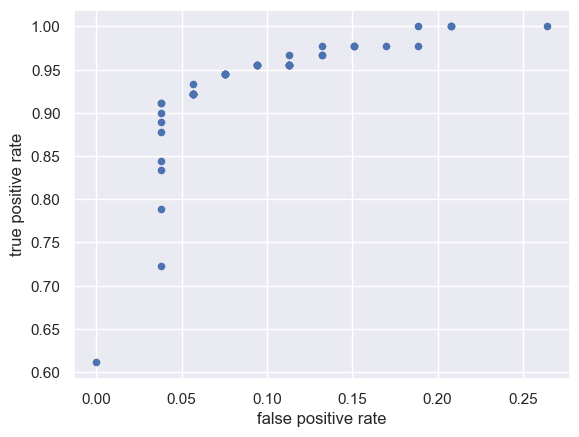

In [102]:
#閾値を0.01から0.99の間で50通りとして、偽陽性率と真陽性率を計算
rates ={}
for threshold in np.linspace(0.01,0.99,num = 50):
    #閾値を超えているかでラベリング
    labels = results['benign'].map(lambda x:1 if x > threshold else 0)
    #実測値とラベルで混同行列を作る
    m = confusion_matrix(y_test,labels)
    rates[threshold] = {'false positive rate':m[0,1]/m[0,:].sum(),
                        'true positive rate':m[1,1]/m[1,:].sum()}

#横軸をfalse positive rate,縦軸をtrue positive rateとしてプロット
pd.DataFrame(rates).T.plot.scatter('false positive rate','true positive rate')

In [103]:
#ROCとAUC関数での描画
#乳がんデータにSVM
#インポート
from sklearn import svm
from sklearn.metrics import roc_curve,auc

#乳がんのデータを読み込み
cancer = load_breast_cancer()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    test_size= 0.5,
    random_state = 66
)

#クラスの初期化と学習
model = SVC(kernel = 'linear',probability=True,random_state=0)
model.fit(X_train,y_train)

#予測確率を取得
y_pred = model.predict_proba(X_test)[:,1]

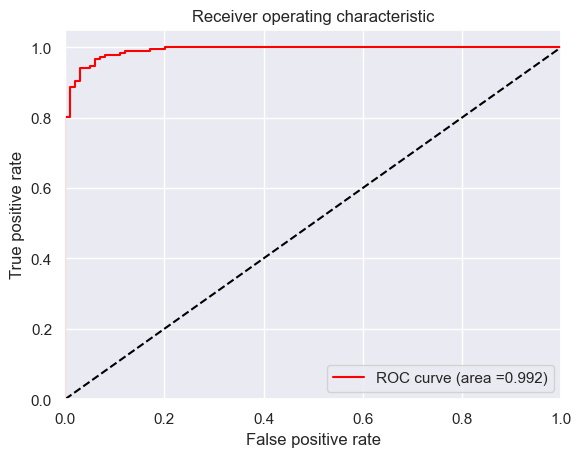

In [104]:
#AUCの計算AUC:ROCの下の面積
#偽陽性率と真陽性率の算出
fpr,tpr,threshold = roc_curve(y_test,y_pred)

#AUCの算出
auc1 = auc(fpr,tpr)

#ROC曲線の描画
plt.plot(fpr,tpr,color='red',label='ROC curve (area =%.3f)' % auc1)
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "best")

In [107]:
y_test,y_pred

(array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0]),
 array([9.391e-01, 9.680e-01, 9.902e-01

#### 理想的なROC曲線とAUC
ROCの理想は閾値を(1.0を超える値から)徐々に小さくした時、原点から真陽性率だけ上昇するのが理想  
AUCは１に近づくほどよい
#### 不均衡データにおけるAUCの活用
AUCは不均衡データにも利用可能  
サンプル数の偏りはfprとtprの分母として扱われるため?

正解率(train):0.750
正解率(test):0.632


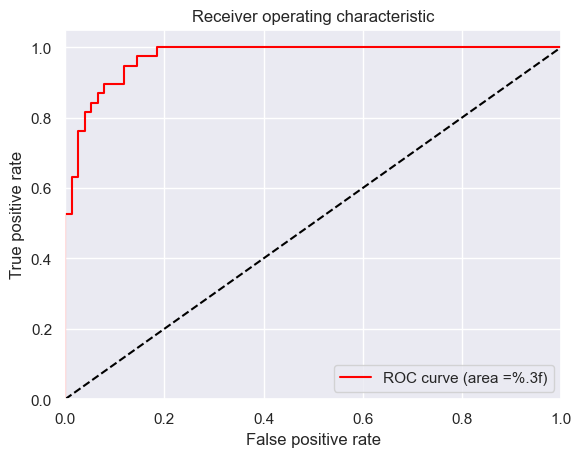

In [85]:
#練習問題10-4
#sklearn.multiclassについて
#https://qiita.com/nazoking@github/items/9decf45d106accc6afe1
#他クラス分類、OneVsRestClassifier:出力が２つ以上のクラスの１つが選ばれる.SVMなど
#他ラベル分類、MultiLabelBinarizer:出力が２つ以上のラベルが排他的でなく選ばれる  
#(どれかひとつと断定的に選ばれるものでない).混合正規分布など

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

iris = load_iris()

X = iris.data
#正解データはonehotvector
y = label_binarize(iris.target,classes = [0,1,2])

#データ分割
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

#決定木クラスの初期化と学習
model = OneVsRestClassifier(SVC(kernel = 'linear',probability=True,random_state=0))
model.fit(X_train,y_train)

print('正解率(train):{:.3f}'.format(model.score(X_train,y_train)))
print('正解率(test):{:.3f}'.format(model.score(X_test,y_test)))
#予測確率を取得(probability = Trueじゃないと使えない)
y_score = model.predict_proba(X_test)
#np.ravelでonehotvectorから１変数に
fpr,tpr,_= roc_curve(y_test.ravel(),y_score.ravel())
roc_auc = auc(fpr,tpr)
#ROC曲線の描画
plt.plot(fpr,tpr,color='red',label='ROC curve (area =%.3f)'.format(roc_auc))
plt.plot([0,1],[0,1],color = 'black',linestyle = '--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "best")


### 回帰モデルの評価指標
平均２乗誤差(MSE)  
予測値と正解の差(残差)の２乗の平均  

平均絶対誤差(MAE)  
残差の絶対値の平均:予測の外れ値の影響を受けにくい  

MedAE  
残差の絶対値の中央値:MAEよりも外れ値に対してロバスト  

決定係数  
SST:検証データの平均値で予測した場合の残差平方和  
SSE:モデルの残差  
R^2=1-SST/SSE 1に近いと良い  

In [86]:
#インポート
from sklearn.datasets import load_boston

#Housingデータせっとを読み込み
boston = load_boston()

#detaFrameにデータを格納
X = pd.DataFrame(boston.data,columns = boston.feature_names)

#住宅価格の中央値(MEDV)のデータを用意
y=pd.Series(boston.target,name='MEDV')

#Xとyを結合して先頭5行を表示
X.join(y).head()
#最近bostonのデータは倫理上の問題によりsklearnから削除されてたらしい

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


## アンサンブル学習
#### バギング
学習データからランダムにn行のデータを復元抽出し、新しい学習データを作成することを繰り返す(ブーストラップ)。  
取り出したデータそれぞれに対して1つ1つモデルを作りモデルの結果を集約して予測する。  

In [ ]:
#インポート
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#乳がんのデータを読み込み
cancer = load_breast_cancer()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 66
)

#K-NNモデルとそのバギングの設定
models = {
    'KNN':KNeighborsClassifier(),
    'bagging':BaggingClassifier(KNeighborsClassifier(),n_estimators=100,random_state = 0)
}

#モデル構築
scores = {}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name,'train_name')] = model.score(X_train,y_train)
    scores[(model_name,'test_name')] = model.score(X_test,y_test)

#結果の表示
pd.Series(scores).unstack()

,test_name,train_name
KNN,0.923077,0.948357
bagging,0.937063,0.950704


In [ ]:
#練習問題10-5
#インポート
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#乳がんのデータを読み込み
cancer = load_iris()

#訓練データとテストデータに分ける
X_train,X_test,y_train,y_test=train_test_split(
    cancer.data,
    cancer.target,
    stratify=cancer.target,
    random_state = 66
)

#K-NNモデルとそのバギングの設定
models = {
    'KNN':KNeighborsClassifier(),
    'bagging':BaggingClassifier(KNeighborsClassifier(),max_samples=0.5,random_state = 0)
}

#モデル構築
scores = {}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    scores[(model_name,'train_name')] = model.score(X_train,y_train)
    scores[(model_name,'test_name')] = model.score(X_test,y_test)

#結果の表示
pd.Series(scores).unstack()

,test_name,train_name
KNN,0.947368,0.973214
bagging,0.947368,0.982143


#### ブースティング
バギングとは違い学習データから予測と正解が近いサンプルを排除し、新しいデータ(主に予測できなかったデータに対して)としてまた学習していく。  
学習不足携行のときに効果的な手法
#### ランダムフォレスト
決定木を弱学習器とするアンサンブル学習アルゴリズム
#### 勾配ブースティング
目的関数(予測と正解の誤差)が最小となるようにブースティングさせる手法  
https://qiita.com/kuroitu/items/57425380546f7b9ed91c#%E5%8B%BE%E9%85%8D%E9%99%8D%E4%B8%8B%E6%B3%95